# Simple modifications of the mach zehnder notebook to calculate with fixed $\theta_{i},i=1,2$ to speed things up a little since here we only care about the values of $\theta$ and $\beta$

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from sympy.plotting import plot3d
from mpl_toolkits.mplot3d import Axes3D
init_printing(use_unicode=True)

In [2]:
jones1= Matrix([0,1])
jones0= Matrix([1,0])

In [96]:
theta=Symbol('theta',real=True)
beta=Symbol('beta',real=True)
def N_mach(N):
    t=np.pi/(2)
    lista=Matrix([[cos(t/N),I*sin(t/N)],[I*sin(t/N),cos(t/N)]])
    return lista
   

def N_mach_zehnder(N):
    K=N_mach(N)
    jones1= Matrix([0,1])
    jones0= Matrix([1,0])
    M1=Matrix([[-1,0],[0,1]])
    A=Matrix([[ beta*exp(I*theta),0],[0,1]])
    r=jones1
    r=K*((M1*A*K)**(N-1))*r
    return r
        

def N_Interferomemer(N):
    r=N_mach_zehnder(N)
    p1=jones0.T*r
    p1=p1[0]*conjugate(p1[0])
    p1=re(p1)
    p2=jones1.T*r
    p2=p2[0]*conjugate(p2[0])
    p2=re(p2)
    pabs=1-p1-p2
    K=symarray('theta', N+1,real=True)
    return pabs,p1,p2,K

In [97]:
M1=Matrix([[0,I],[1,0]])
M2=Matrix([[0,1],[I,0]])
M1*M2

⎡-1  0⎤
⎢     ⎥
⎣0   1⎦

In [98]:
pabs,pd1,pd2,K=N_Interferomemer(5)

In [99]:
pd2.subs(beta,0.5).subs(theta,0)

In [100]:
def con_barra(plot):
    plot2 = plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    backend = plot2.backend(plot2)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    plt.close(backend.fig)
    ax.collections[0].set_cmap('viridis') # optionally change the colormap
    plt.colorbar(ax.collections[0],ticks=[0.2,0.4,0.6,0.8,0.99])
    plt.yticks(np.arange(-np.pi/2,3*np.pi /2 +1, step=np.pi/2),[r'$-\pi$',r'$-\frac{\pi}{2}$',0,r'$\frac{\pi}{2}$',r'$\pi$'])
    return plt.show()


<IPython.core.display.Javascript object>


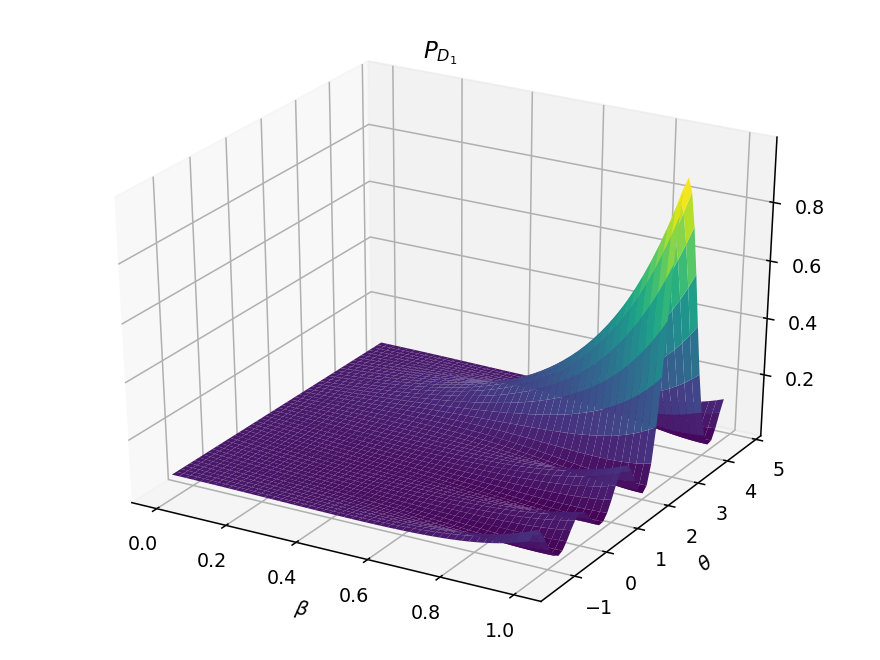

<IPython.core.display.Javascript object>


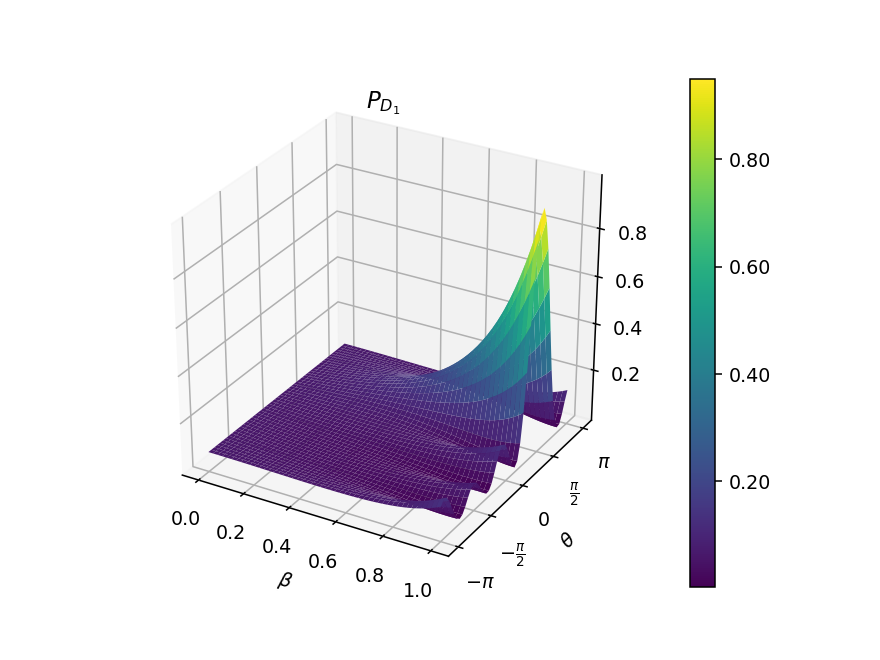

<IPython.core.display.Javascript object>


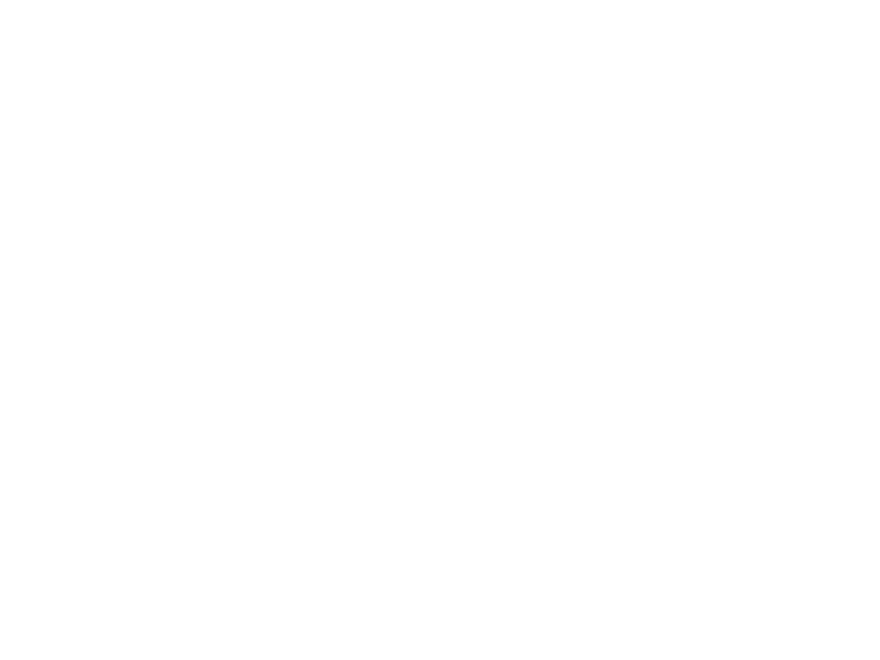

In [101]:
con_barra(plot3d(pd1,(beta,0,1),(theta,-np.pi/2,3*np.pi/2),
                 xlabel=r'$\beta$',ylabel=r'$\theta$',title='$P_{D_{1}}$'))

<IPython.core.display.Javascript object>


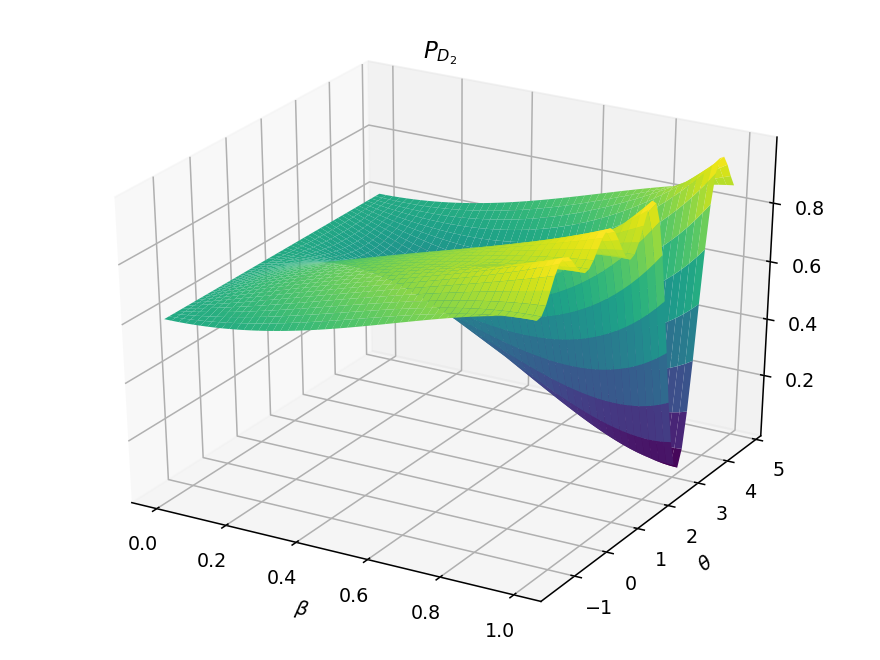

<IPython.core.display.Javascript object>


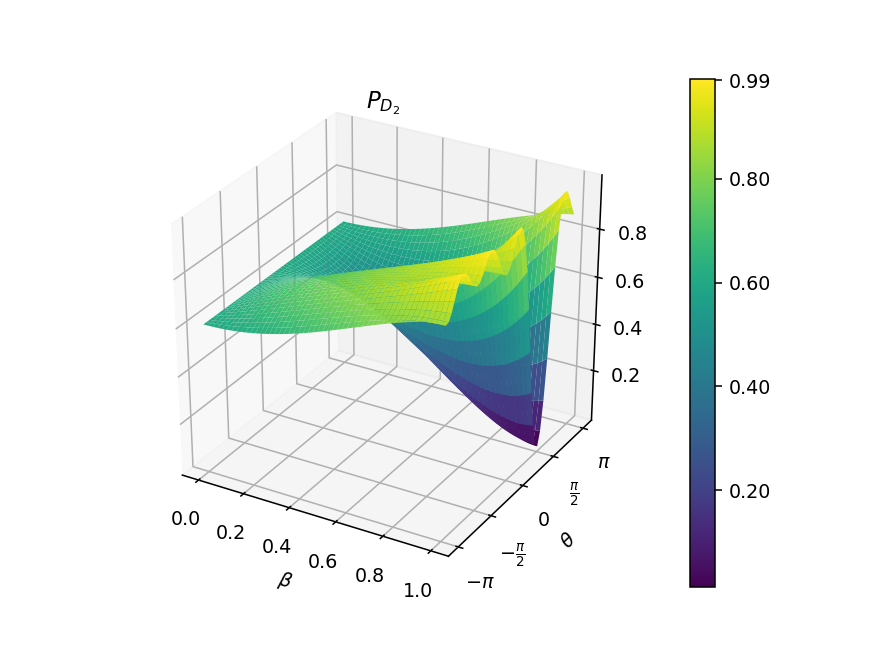

<IPython.core.display.Javascript object>


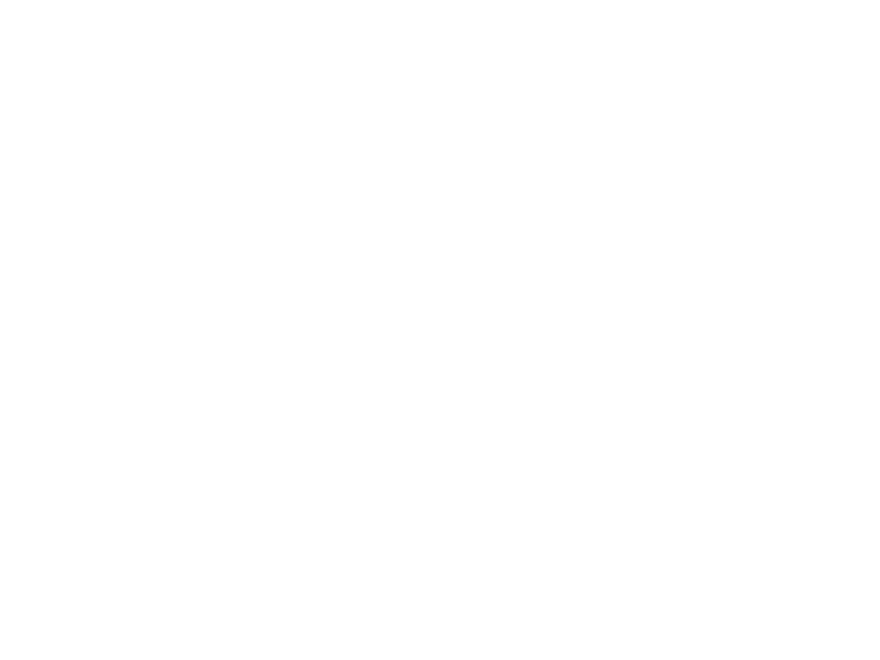

In [102]:
con_barra(plot3d(pd2,(beta,0,1),(theta,-np.pi/2,3*np.pi/2),
                 xlabel=r'$\beta$',ylabel=r'$\theta$',title='$P_{D_{2}}$'))

<IPython.core.display.Javascript object>


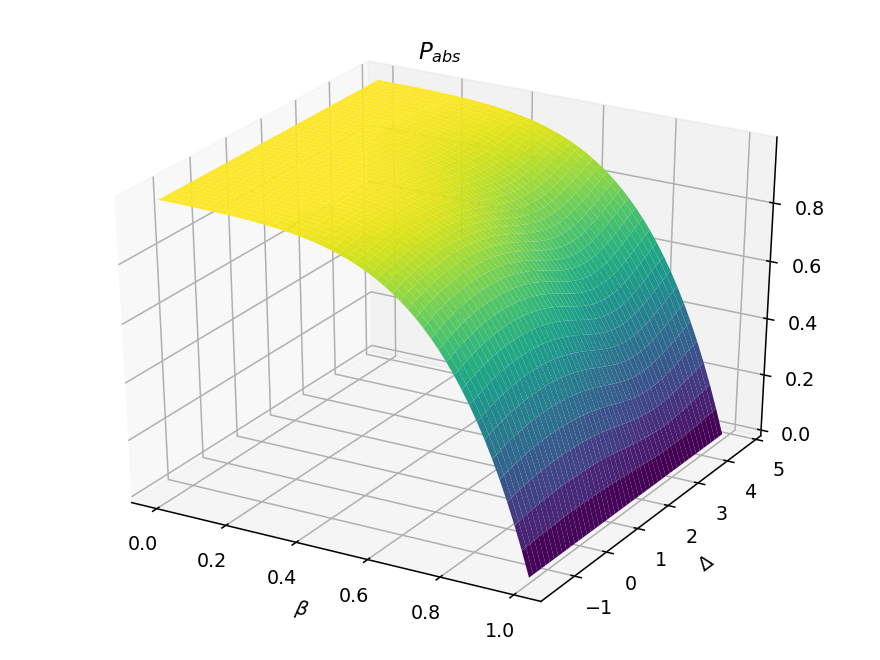

<IPython.core.display.Javascript object>


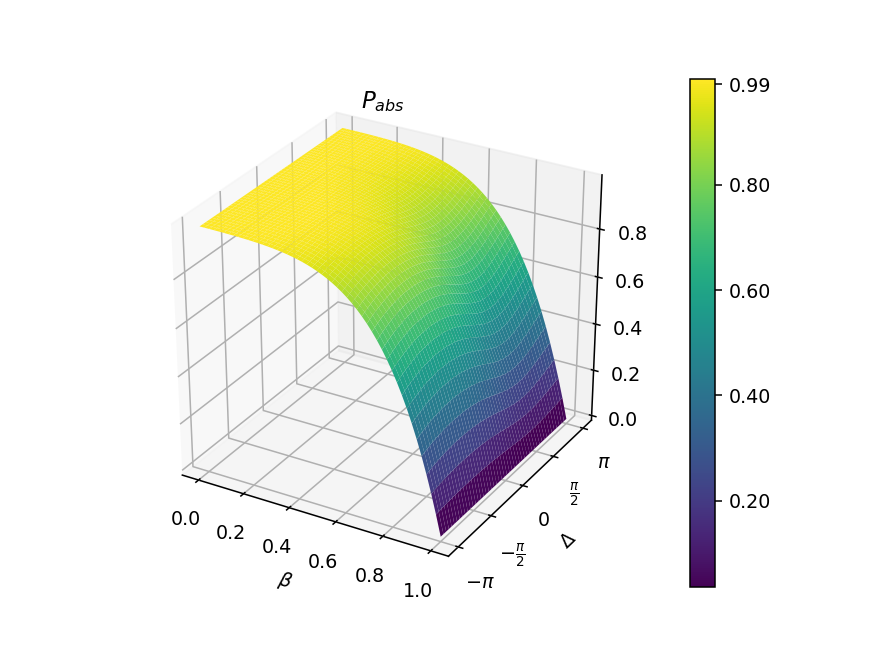

<IPython.core.display.Javascript object>


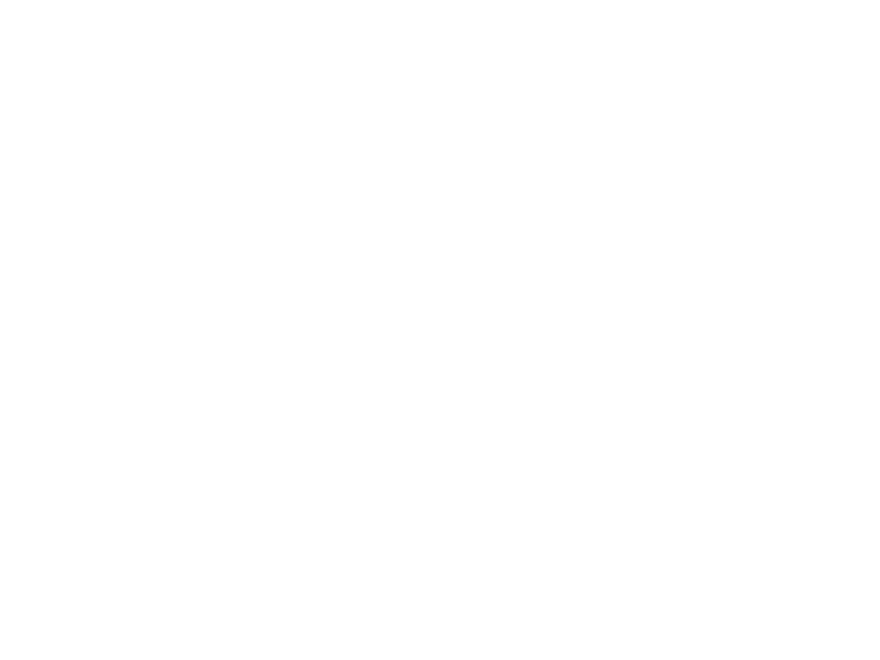

In [74]:
con_barra(plot3d(pabs,(beta,0,1),(theta,-np.pi/2,3*np.pi/2),
                 xlabel=r'$\beta$',ylabel=r'$\Delta$',title='$P_{abs}$'))

In [106]:
M1=Matrix([[0,exp(I*beta)],[1,0]])
M2=Matrix([[0,1],[exp(I*theta),0]])
M1*M2

⎡ ⅈ⋅β  ⅈ⋅θ   ⎤
⎢ℯ   ⋅ℯ     0⎥
⎢            ⎥
⎣    0      1⎦